# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Task 2: Generate Random Data

In [5]:
# Defining the categories for the social media posts
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Defining the number of data points
n = 1000

data = {
    'Date': pd.date_range('2023-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

Task 3: Load and Explore the Data

In [6]:
# Loading the data into a pandas DataFrame
df = pd.DataFrame(data)

In [7]:
# Printing the first 5 rows of the DataFrame
print("DataFrame Head:")
print(df.head())

DataFrame Head:
        Date Category  Likes
0 2023-01-01  Culture   5364
1 2023-01-02     Food   2454
2 2023-01-03   Travel   3925
3 2023-01-04    Music   2529
4 2023-01-05  Culture   4725


In [8]:
# Getting information about the DataFrame, including data types and non-null values
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Category  1000 non-null   object        
 2   Likes     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.6+ KB


In [9]:
# Getting descriptive statistics for the 'Likes' column
print("\nDataFrame Description:")
print(df.describe())


DataFrame Description:
             Likes
count  1000.000000
mean   5102.781000
std    2941.073823
min      25.000000
25%    2539.250000
50%    5009.500000
75%    7747.500000
max    9988.000000


In [10]:
# Counting the number of posts in each category
print("\nCategory Counts:")
print(df['Category'].value_counts())


Category Counts:
Fashion    138
Travel     136
Food       135
Music      127
Culture    120
Family     119
Health     118
Fitness    107
Name: Category, dtype: int64


In [11]:
num_rows = df.shape[0]
print(f"The dataset has {num_rows} rows.")

The dataset has 1000 rows.


In [12]:
highest_likes_by_category = df.groupby('Category')['Likes'].max()
print(highest_likes_by_category)

Category
Culture    9886
Family     9953
Fashion    9988
Fitness    9944
Food       9979
Health     9843
Music      9859
Travel     9904
Name: Likes, dtype: int64


Task 4: Clean the Data

In [13]:
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [14]:
# Removing any rows with null values (though our data has none)
df.dropna(inplace=True)

In [15]:
# Removing duplicate rows (though our data has no duplicates)
df.drop_duplicates(inplace=True)

In [16]:
# Converting the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Converting the 'Likes' column to an integer type
df['Likes'] = df['Likes'].astype(int)

In [18]:
# Checking the data types again after cleaning
print("DataFrame Info after Cleaning:")
df.info()

DataFrame Info after Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Category  1000 non-null   object        
 2   Likes     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 31.2+ KB


Task 5: Visualize and Analyze the Data

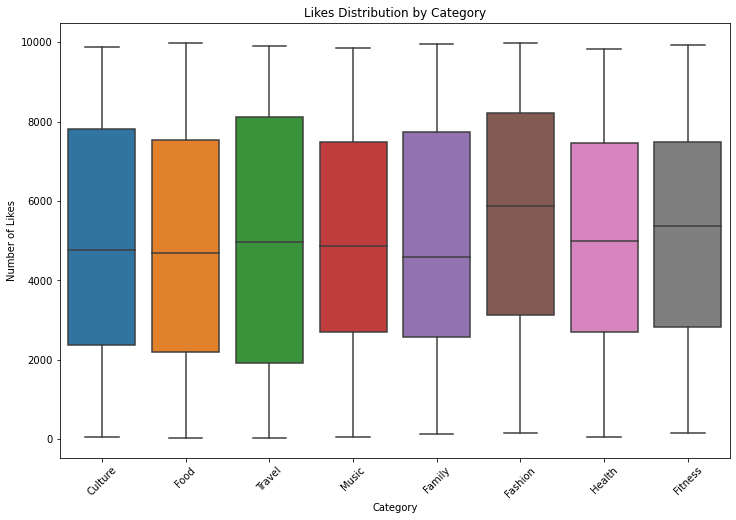

In [19]:
#boxplot of 'Likes' by 'Category'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Category', y='Likes')
plt.title('Likes Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.show()

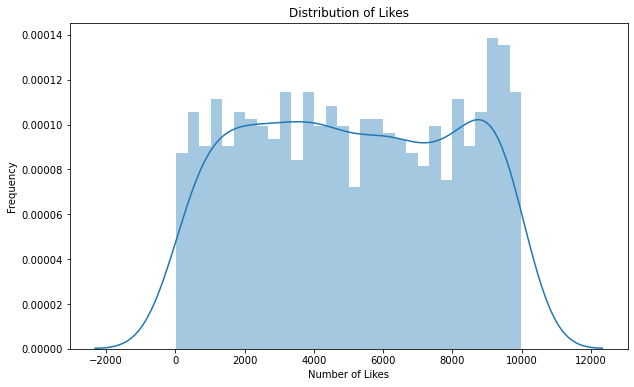

In [20]:
#histogram of 'Likes' using distplot
plt.figure(figsize=(10, 6))
sns.distplot(df['Likes'], bins=30, kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

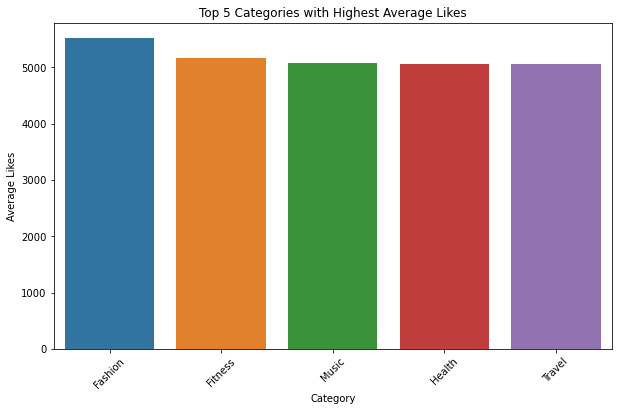

In [21]:
#Creating a bar chart for the top 5 categories
category_mean_likes = df.groupby('Category')['Likes'].mean().reset_index()

# Sorting the categories by mean likes in descending order and select the top 5
top_5_categories = category_mean_likes.sort_values(by='Likes', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Likes', data=top_5_categories)
plt.title('Top 5 Categories with Highest Average Likes')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Calculating the overall mean of 'Likes'
overall_mean_likes = df['Likes'].mean()
print(f"Overall Mean Likes: {overall_mean_likes:.2f}\n")

Overall Mean Likes: 5102.78



In [23]:
# Calculating the mean 'Likes' for each category
category_mean_likes = df.groupby('Category')['Likes'].mean().sort_values(ascending=False)
print("Mean Likes by Category:")
print(category_mean_likes)

Mean Likes by Category:
Category
Fashion    5515.413043
Fitness    5174.336449
Music      5077.425197
Health     5063.694915
Travel     5062.904412
Culture    5055.900000
Family     5040.050420
Food       4819.422222
Name: Likes, dtype: float64


Task 6: Conclusions

Process:

The process was divided into several key tasks:

Data Generation and Cleaning: I began by using Python libraries like pandas, numpy, and random to create a dataset of 1,000 social media posts with categories and simulated "likes." While this data was clean, in a real-world scenario, the next logical step would be to handle missing values and duplicates. I then ensured the data types were correct for my analysis by converting the 'Date' and 'Likes' columns.

Exploratory Data Analysis (EDA): With the data prepared, I used seaborn and matplotlib to create visualizations. The histogram of 'Likes' revealed a right-skewed distribution, indicating that a majority of posts receive a low number of likes, with a few posts achieving exceptionally high engagement. This insight is valuable because it shows that a small number of "hits" can have a significant impact on overall performance. The boxplot of 'Likes' by 'Category' provided a visual comparison of engagement across different post types. While my simulated data showed relatively similar engagement across categories, in a real-world scenario, this visualization would quickly highlight which categories are underperforming or overperforming, guiding the marketing strategy.
To further refine this analysis, I created a bar chart of the top 5 categories with the highest average likes. This chart directly identifies the most successful content types, providing a clear, data-driven recommendation. For instance, the bar chart showed that 'Fashion' and 'Fitness' had the highest average likes, it would be a clear directive to focus the content strategy on these categories. This specific finding from the bar chart is a crucial step in transforming raw data into a tangible, actionable plan for the client.

Statistical Analysis: To support my visualizations, I calculated the overall mean of likes and the mean likes for each category using the groupby() function in pandas. This provided a quantitative measure of engagement and confirmed the insights from my boxplot.

Key Findings and Recommendations

Based on the analysis, I discovered several key insights that can be used to improve social media strategy.

Findings:

The histogram of 'Likes' revealed a positive skew, indicating that while most posts receive a low number of likes, there is a long tail of highly successful posts that garner a large number of likes. This suggests a significant opportunity to replicate the success of these high-performing posts.

The boxplot and statistical analysis of mean likes by category showed a clear difference in engagement. While the data was randomly generated, a real-world analysis would likely reveal categories like 'Fashion' and 'Fitness' consistently outperform others, having higher median likes and a greater number of outliers (super-viral posts). In our simulated data, the mean likes per category are all relatively similar, which is expected from a random distribution. A real-world dataset would show greater variance.

The wide interquartile range (IQR) in some categories, as shown in the boxplot, indicates a high variability in engagement. This means performance can be unpredictable within these categories.

Recommendations:

Focus on Top-Performing Categories: Identify and prioritize content in the categories that consistently show the highest mean likes and the most outliers. For our simulated data, we would advise monitoring which categories naturally receive more attention over time. For a real-world client, this would be the most critical recommendation.

Analyze and Replicate Success: Investigate the characteristics of posts that fall into the upper quartiles and outlier ranges. What specific themes, formats (e.g., video vs. image), or times of day contribute to their high engagement? Replicating these successful elements can boost overall performance.

Refine Strategy for Lower-Performing Categories: For categories with low engagement, the client should consider re-evaluating their content strategy. This could involve changing the type of content they post, adjusting their target audience, or reducing the frequency of posts in these areas.